### Preparing Data and Modeling

We have no numerical features. We will need to transform all of them in order to make them readable by ML models.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test

In [2]:
logreg = LogisticRegression()
le = LabelEncoder()
ohe = OneHotEncoder()

In [3]:
X_train = X_train.drop(columns=['CouncilDistrict', 'Latitude', 'Longitude', 'ViolationDescription', 'Action',
                                 'InspectionDate','Zipcode', 'Camis', 'Dba', 'InspectionYear', 'IsChain',
                                 'Boro', 'Cuisine'])

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117697 entries, 126620 to 248657
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ViolationCode   117697 non-null  object
 1   Grade           117697 non-null  object
 2   InspectionType  117697 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


In [5]:
X_test = X_test.drop(columns=['CouncilDistrict', 'Latitude', 'Longitude', 'ViolationDescription', 'Action',
                                 'InspectionDate','Zipcode', 'Camis', 'Dba', 'InspectionYear', 'IsChain',
                                 'Boro', 'Cuisine'])

In [6]:
y_train_le = le.fit_transform(y_train)
print(y_train_le)

[1 1 0 ... 0 0 1]


In [7]:
y_test_le = le.fit_transform(y_test)

In [8]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ViolationCode_04A,ViolationCode_02H,ViolationCode_08A,ViolationCode_08C,ViolationCode_10F,ViolationCode_09C,ViolationCode_04L,ViolationCode_06C,ViolationCode_02G,ViolationCode_06B,...,Grade_B,Grade_P,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Non-operational)
126620,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14307,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
286220,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
374436,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
47465,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
X_test_ohe = ohe.fit_transform(X_test)
X_test_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ViolationCode_10B,ViolationCode_04H,ViolationCode_10F,ViolationCode_10J,ViolationCode_06E,ViolationCode_08A,ViolationCode_04N,ViolationCode_09C,ViolationCode_04M,ViolationCode_06C,...,Grade_B,Grade_N,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Non-operational)
234299,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
309886,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
256582,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
66275,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
121712,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train_ohe, y_train_le)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Predict

In [11]:
# Generate predictions
y_hat_train = logreg.predict(X_train_ohe)
y_hat_test = logreg.predict(X_test_ohe)

### Comparing Train and Test results

In [12]:
residuals = np.abs(y_train_le - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    117697
dtype: int64
------------------------------------
0    1.0
dtype: float64


In [13]:
residuals = np.abs(y_test_le - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    49355
1    29110
dtype: int64
------------------------------------
0    0.629007
1    0.370993
dtype: float64


### Confusion Matrix

For our problem, I think it is False negatives that we need to watch out for, since we never want to predict a True Critical Flag as Non-Critical.

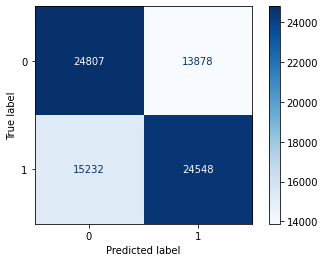

In [14]:
plot_confusion_matrix(logreg, X_test_ohe, y_test_le,
                     cmap=plt.cm.Blues)
plt.show()

### Evaluation Metrics
Out of all the predictions our model made, what percentage were correct

* Ideally, we want 'recall' high and 'precision' low in the sense that it will be better to predict a CriticalFlag as positive when it's negative.

In [15]:
print('Training Precision: ', precision_score(y_train_le, y_hat_train))
print('Testing Precision: ', precision_score(y_test_le, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train_le, y_hat_train))
print('Testing Recall: ', recall_score(y_test_le, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_le, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test_le, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train_le, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test_le, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.638838286576797



Training Recall:  1.0
Testing Recall:  0.6170940170940171



Training Accuracy:  1.0
Testing Accuracy:  0.6290065634359269



Training F1-Score:  1.0
Testing F1-Score:  0.6277779198526967


In [16]:
y_score = logreg.fit(X_train_ohe, y_train_le).decision_function(X_test_ohe)

fpr, tpr, thresholds = roc_curve(y_test_le, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7585566265227784


AUC: 0.7585566265227784


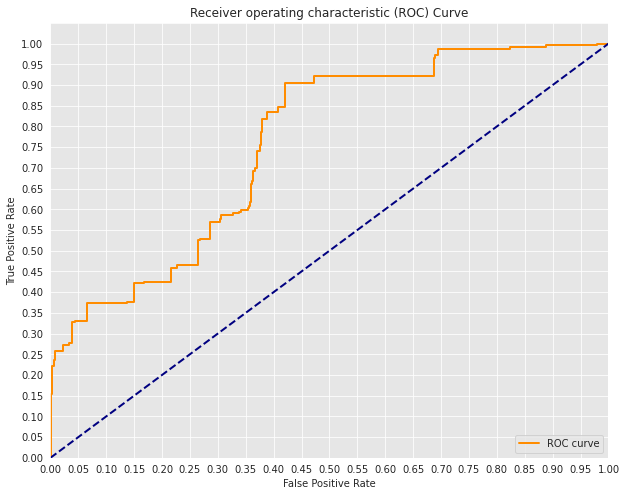

In [17]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()